# ceterisParibus2 plots for classification models
*Author: Dariusz Komosinski*

In [1]:
library(devtools)
devtools::install_github("ModelOriented/ceterisParibus2")
library(ceterisParibus2)
devtools::install_github("ModelOriented/DALEX2")
library(DALEX2)
install.packages("gower")
library(gower)

Skipping install of 'ceterisParibus2' from a github remote, the SHA1 (459fec2e) has not changed since last install.
  Use `force = TRUE` to force installation
Loading required package: ggplot2
Skipping install of 'DALEX2' from a github remote, the SHA1 (9b43c427) has not changed since last install.
  Use `force = TRUE` to force installation
Welcome to DALEX2 (version: 0.9).
Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)


Here we will use the HR data to present the ceterisParibus2 package for classification models.


In [2]:
head(HR)
new_observation <- HR_test[1,]
new_observation

gender,age,hours,evaluation,salary,status
male,32.58267,41.88626,3,1,fired
female,41.21104,36.34339,2,5,fired
male,37.70516,36.81718,3,0,fired
female,30.06051,38.96032,3,2,fired
male,21.10283,62.15464,5,3,promoted
male,40.11812,69.53973,2,0,fired


gender,age,hours,evaluation,salary,status
male,57.72683,42.31527,2,2,fired


Select neighbourhood sample, random sample, specific variables.

In [3]:
similar_employees <- select_neighbours(HR_test, new_observation, n = 10)
similar_employees
random_employees <- select_sample(HR_test, n = 10)
random_employees
variable_splits <- calculate_variable_split(HR, variables = c("hours", "gender"))

,gender,age,hours,evaluation,salary,status
1,male,57.72683,42.31527,2,2,fired
5896,male,58.07479,40.88603,2,2,fired
4027,male,57.55585,39.82995,2,2,fired
5392,male,56.36109,43.62382,2,2,fired
3087,male,58.29928,38.58202,2,2,fired
3089,male,53.88047,42.74093,2,2,fired
8907,male,57.34278,37.43454,2,2,fired
7394,male,53.56278,43.01359,2,2,fired
5830,male,55.97990,37.13759,2,2,fired
5114,male,52.66504,39.93472,2,2,fired


,gender,age,hours,evaluation,salary,status
8809,male,47.49110,79.90453,5,3,promoted
3856,male,22.95738,44.07584,5,1,promoted
7072,male,23.86000,43.23433,3,2,ok
4931,male,49.85496,38.49570,3,4,fired
6360,female,29.64525,38.23911,3,3,fired
6291,male,49.58255,35.60498,3,4,fired
2389,female,38.66057,52.36269,3,1,fired
973,male,34.96460,42.20483,4,1,promoted
5448,female,37.67491,74.62615,2,1,promoted
3665,male,55.01822,51.80582,2,0,fired


## GLM

First, we fit a model.

In [4]:
library(nnet)
m_glm <- multinom(status ~ . , data = HR)

# weights:  21 (12 variable)
initial  value 8620.810629 
iter  10 value 7002.127738
iter  20 value 6239.478146
iter  20 value 6239.478126
iter  20 value 6239.478124
final  value 6239.478124 
converged


To calculate individual variable profiles (ceteris paribus profiles), i.e. series of predictions from a model calculated for observations with altered single coordinate, we use the `ceterisParibus2` package.

We create an object of the `ceteris_paribus_explainer` class.

In [5]:
ivp_glm <- individual_variable_profile(m_glm,
                            data = HR_test,
                            new_observation =  new_observation)

Now we can plot individual profiles

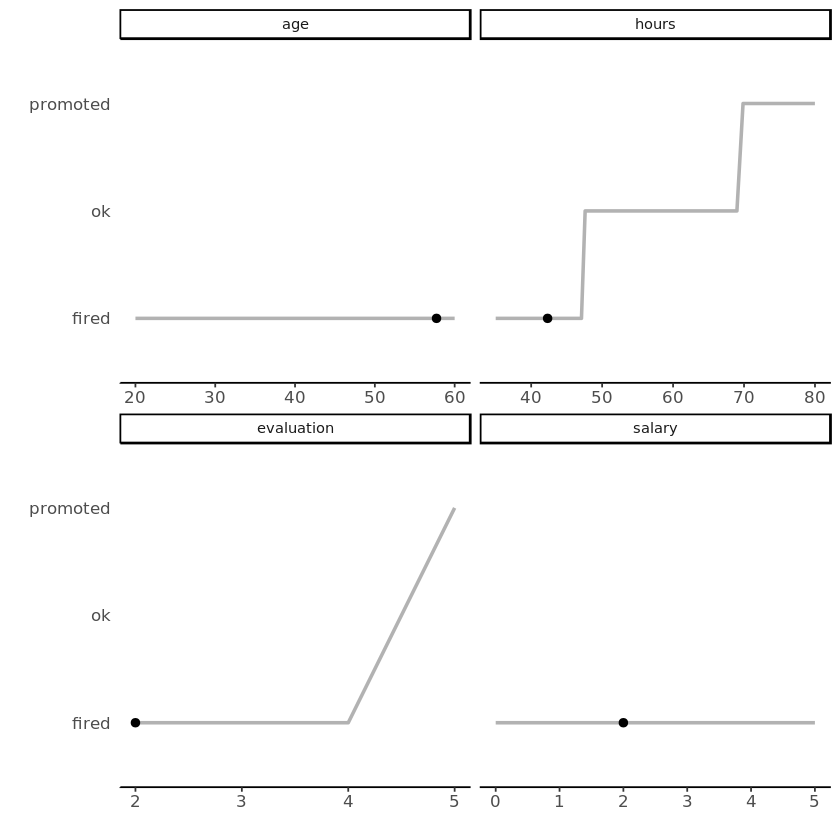

In [6]:
plot(ivp_glm)

Ceteris paribus plots for neighbourhood sample, random sample, selected variables.

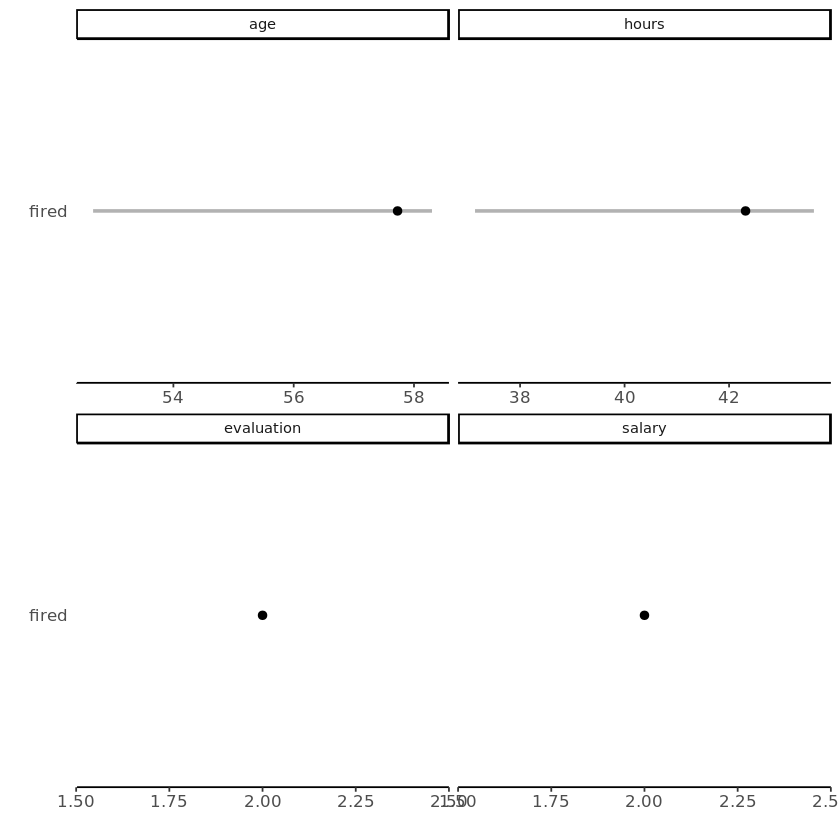

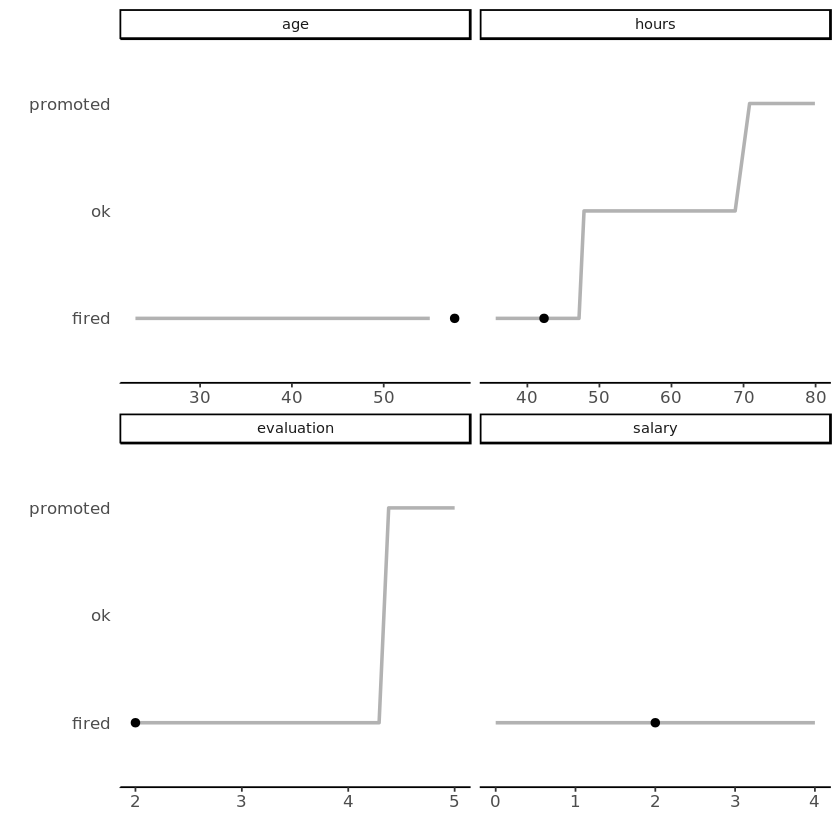

In [7]:
ivp_glm_neighbours <- individual_variable_profile(m_glm,
                            data = similar_employees,
                            new_observation =  new_observation)
plot(ivp_glm_neighbours)
ivp_glm_random <- individual_variable_profile(m_glm,
                            data = random_employees,
                            new_observation =  new_observation)
plot(ivp_glm_random)

Data frame with profiles.

In [8]:
profiles <- calculate_variable_profile(data = new_observation,
                                       variable_splits = variable_splits,
                                       model = m_glm)
head(profiles)

,gender,age,hours,evaluation,salary,status,_yhat_,_vname_,_ids_
1,male,57.72683,35.00000,2,2,fired,fired,hours,1
1.1,male,57.72683,35.00415,2,2,fired,fired,hours,1
1.2,male,57.72683,35.01673,2,2,fired,fired,hours,1
1.3,male,57.72683,35.03605,2,2,fired,fired,hours,1
1.4,male,57.72683,35.06120,2,2,fired,fired,hours,1
1.5,male,57.72683,35.09625,2,2,fired,fired,hours,1


For another type of models we proceed analogously.

## randomForest

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)
randomForest 4.6-12
Type rfNews() to see new features/changes/bug fixes.

Attaching package: ‘randomForest’

The following object is masked from ‘package:ggplot2’:

    margin



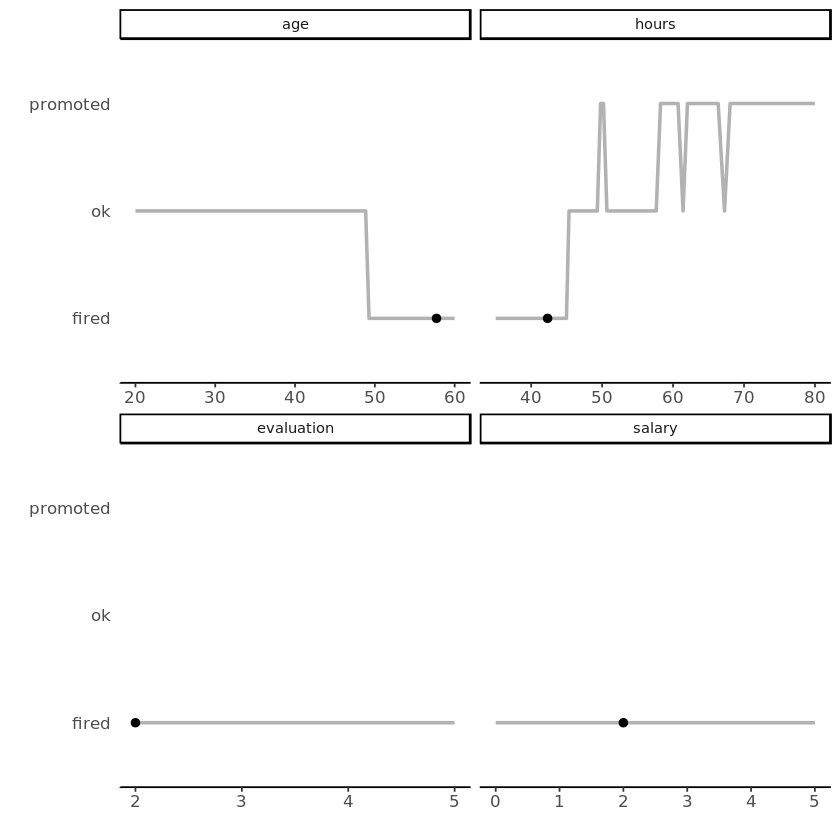

In [9]:
install.packages("randomForest")
library(randomForest)
m_rf <- randomForest(status ~ . , data = HR)

ivp_rf <- individual_variable_profile(m_rf,
                            data = HR_test,
                            new_observation =  new_observation)

plot(ivp_rf)

## SVM

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)


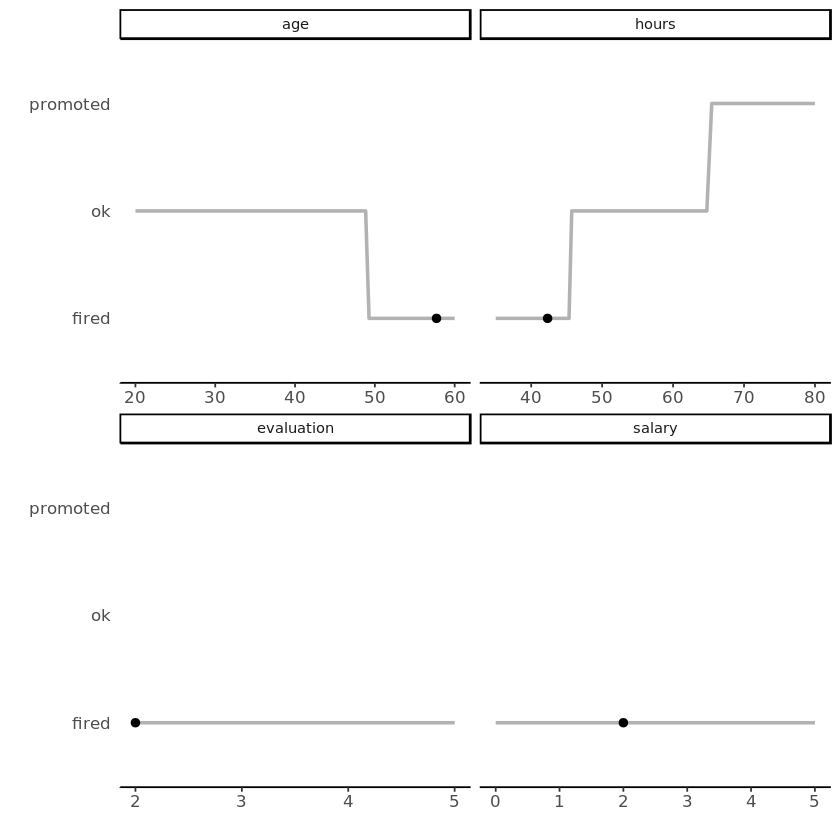

In [10]:
install.packages("e1071")
library(e1071)
m_svm <- svm(status ~ . , data = HR)

ivp_svm <- individual_variable_profile(m_svm,
                            data = HR_test,
                            new_observation =  new_observation)

plot(ivp_svm)

## knn

In [11]:
#install.packages("caret")
library(caret)
m_knn <- knn3(status ~ . , data = HR, k = 5)

p_fun <- function(model, new_observation){
  predict(model, newdata = new_observation, type = "class")
}

ivp_knn <- individual_variable_profile(m_knn,
                            data = HR_test,
                            new_observation =  new_observation,
                            predict_function = p_fun)

plot(ivp_knn)

ERROR: Error in library(caret): there is no package called ‘caret’


## nnet

# weights:  93
initial  value 9282.313881 
iter  10 value 7924.225796
iter  20 value 7142.147242
iter  30 value 7099.335654
iter  40 value 7024.055116
iter  50 value 6938.047986
iter  60 value 6513.786027
iter  70 value 6425.012973
iter  80 value 6405.471689
iter  90 value 6401.254136
iter 100 value 6399.981656
final  value 6399.981656 
stopped after 100 iterations


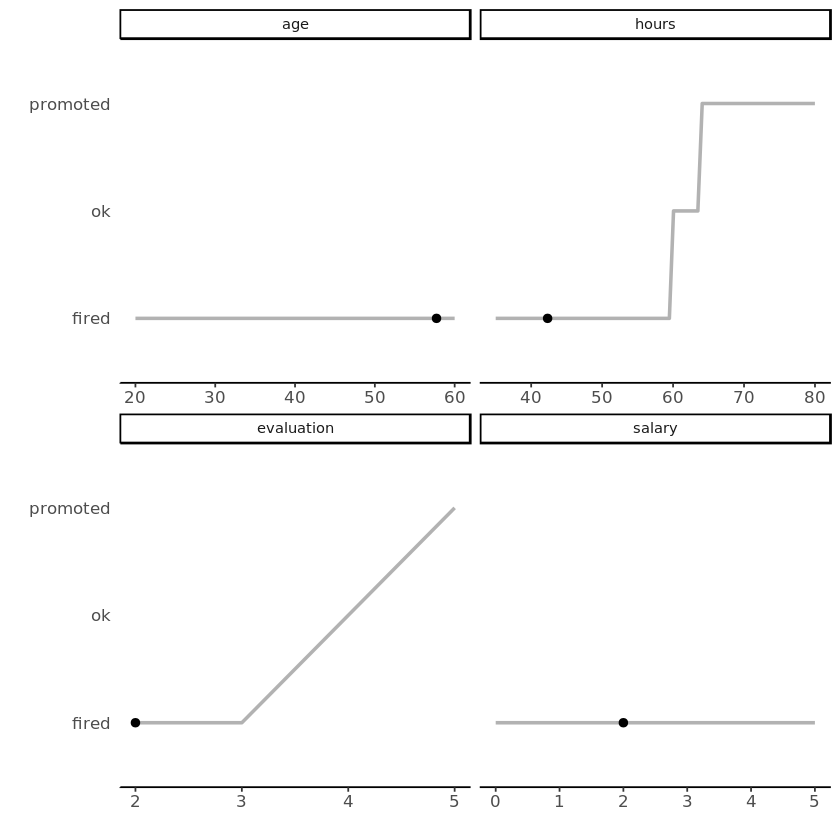

In [12]:
library(nnet)

m_nnet <- nnet(status ~ . , data = HR, size = 10, linout = TRUE)

p_fun <- function(model, new_observation){
  predict(model, newdata = new_observation, type = "class")
}

ivp_nnet <- individual_variable_profile(m_nnet,
                            data = HR_test,
                            new_observation =  new_observation,
                            predict_function = p_fun)

plot(ivp_nnet)

## Several models at once

To produce plot with many models in one graph, use argument `color = _label_`.

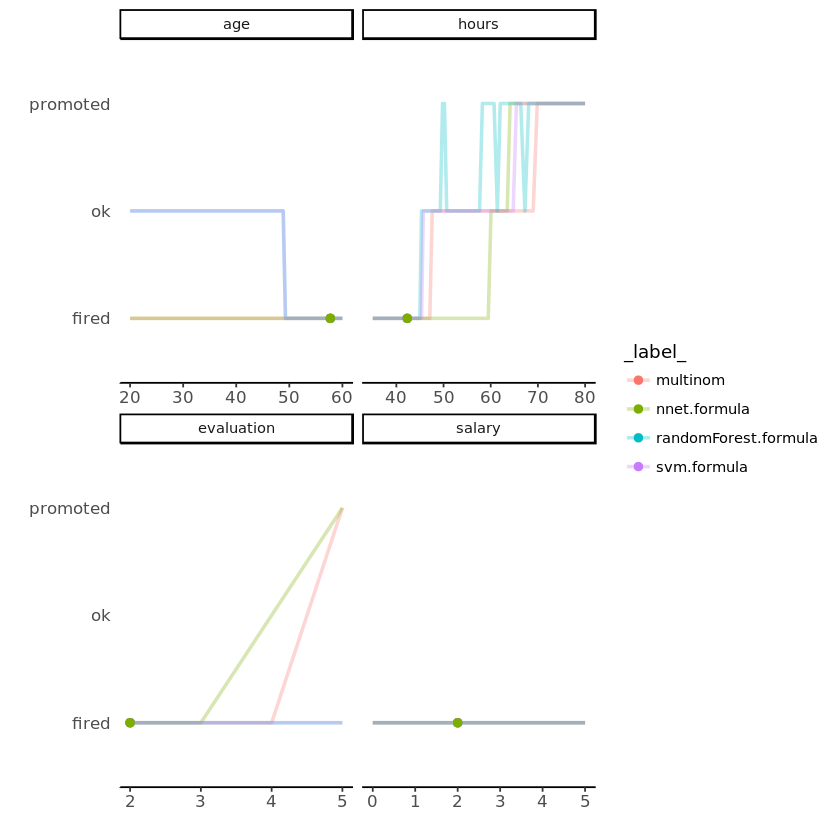

In [15]:
plot(ivp_glm, ivp_rf, ivp_svm, ivp_nnet, color = "_label_")